<a href="https://colab.research.google.com/github/FathimaNazarudeen/Advanced-Computing-Lab/blob/main/Experiment%2012/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from tensorflow import keras
mnistDB=keras.datasets.mnist


In [10]:
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
print("Shape of x_train:",x_train.shape)

Shape of x_train: (60000, 28, 28)


In [14]:
print("Shape of :x_test",x_test.shape)

Shape of :x_test (10000, 28, 28)


In [15]:
print("Shape of x_train",y_train.shape)
print("Shape of :x_test",y_test.shape)


Shape of x_train (60000,)
Shape of :x_test (10000,)


In [19]:
import matplotlib.pyplot as plt


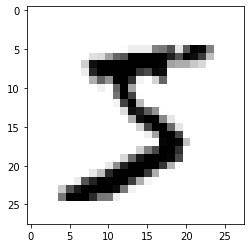

In [22]:
plt.imshow(x_train[0],cmap='binary')


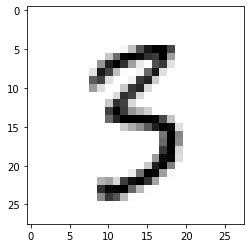

In [23]:
plt.imshow(x_train[33000],cmap='binary')


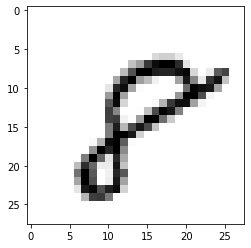

In [24]:
plt.imshow(x_train[59999],cmap='binary')

In [25]:
x_train=x_train.reshape((60000,28,28,1))

In [26]:
x_test=x_test.reshape((10000,28,28,1))

In [27]:
x_train=x_train.astype('float32')/255

In [28]:
x_test=x_test.astype('float32')/255

In [30]:
print("Shape of x_train",x_train.shape)
print("Shape of :x_test",x_test.shape)


Shape of x_train (60000, 28, 28, 1)
Shape of :x_test (10000, 28, 28, 1)


In [31]:
ml=keras.models.Sequential()

In [32]:
ml.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=x_train.shape[1:]))

In [33]:
input_shape=x_train.shape[1:]

In [35]:
ml.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [37]:
ml.add(keras.layers.MaxPooling2D((2,2)))

In [38]:
ml.add(keras.layers.Dropout((0.25)))

In [39]:
ml.add(keras.layers.Flatten())

In [40]:
ml.add(keras.layers.Dense(128,activation="relu"))

In [41]:
ml.add(keras.layers.Dropout((0.25)))

In [42]:
ml.add(keras.layers.Dense(10,activation="softmax"))

In [44]:
ml.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [46]:
ml.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
ml.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 182s 96ms/step - loss: 0.1370 - accuracy: 0.9580 - val_loss: 0.0416 - val_accuracy: 0.9866
Epoch 2/50
1696/1875 [==========================>...] - ETA: 16s - loss: 0.0563 - accuracy: 0.9828